In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# def f(x):
#     return np.sin(2.5 * x)

# np.random.seed(438756)

# xdata = np.linspace(0, 1, 1000)
# np.random.shuffle(xdata)
# ydata = f(xdata) + np.random.normal(loc=0.075, scale=0.1, size=len(xdata))

# xeval = np.linspace(xdata.min(), xdata.max(), 100)
# yeval = f(xeval)

# # residuals = ydata - np.interp(xdata, xeval, yeval)
# mean_residuals = ydata - f(xdata)
# median_shift = np.median(mean_residuals)
# median_residuals = mean_residuals - median_shift
# print(np.count_nonzero(median_residuals < 0), np.count_nonzero(median_residuals > 0))

# print(median_shift)
# median_eval = yeval + median_shift

# n_above = np.count_nonzero(ydata > np.interp(xdata, xeval, median_eval))
# n_below = np.count_nonzero(ydata < np.interp(xdata, xeval, median_eval))
# print(f"Above/Below: {n_above}/{n_below}")

# plt.scatter(xdata, ydata, alpha=100/len(xdata))
# plt.plot(xeval, yeval, "k-", lw=2)
# plt.plot(xeval, median_eval, "r-", lw=2)
# plt.show()

0.0031162352357597053
1000 1000
Above/Below: 1000/1000


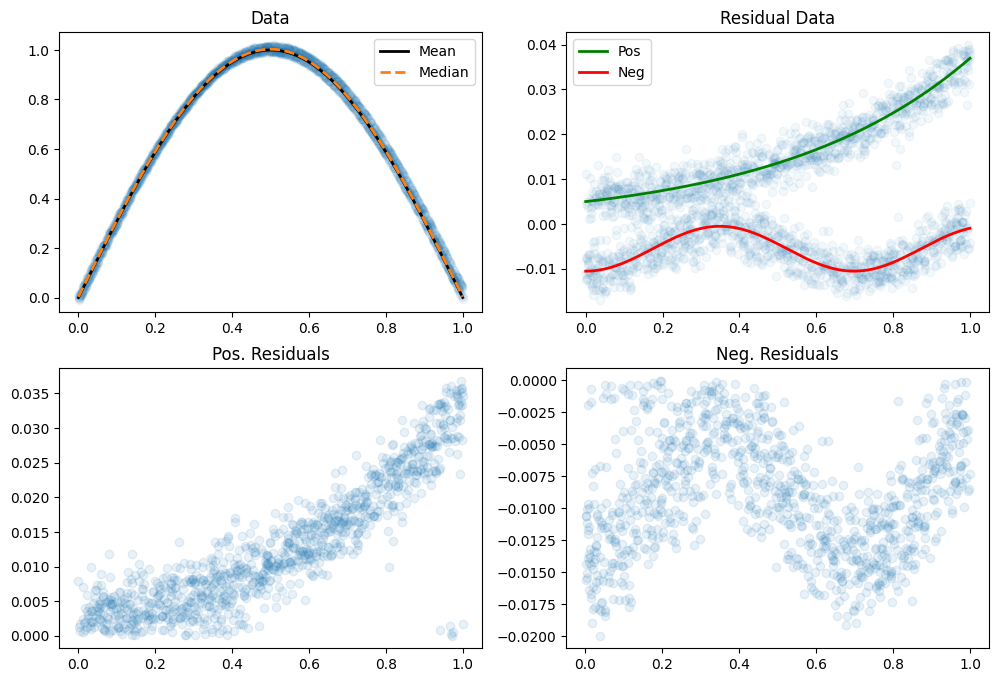

In [3]:
import numpy as np
import matplotlib.pyplot as plt

res_factor = 0.5 * 1e-2


def f_res_pos(x):
    return res_factor * np.exp(2 * x)


def f_res_neg(x):
    return -res_factor * (np.cos(9 * x) + 1.1)


def f_mean(x):
    return np.sin(3.1415 * x)


np.random.seed(438756)

N = 2000
M = 10  # increase this if you want the mean and median to be more different
# but right now I want to see if the residuals are learned properly.
xdata = np.linspace(0, 1, N)
np.random.shuffle(xdata)
residual_data = np.concatenate(
    [
        f_res_pos(xdata[: N // 2 + M]) + np.random.normal(scale=0.003, size=N // 2 + M),
        f_res_neg(xdata[N // 2 + M :]) + np.random.normal(scale=0.003, size=N // 2 - M),
    ]
)
ydata = f_mean(xdata) + residual_data


np.save("x.npy", xdata)
np.save("y.npy", ydata)

mean_residuals = ydata - f_mean(xdata)
median_shift = np.median(mean_residuals)
print(median_shift)


def f_median(x):
    return f_mean(x) + median_shift


median_residuals = mean_residuals - median_shift
pos_mask = median_residuals > 0
neg_mask = median_residuals < 0
print(np.count_nonzero(neg_mask), np.count_nonzero(pos_mask))


xeval = np.linspace(xdata.min(), xdata.max(), 1000)

n_above = np.count_nonzero(ydata > np.interp(xdata, xeval, f_median(xeval)))
n_below = np.count_nonzero(ydata < np.interp(xdata, xeval, f_median(xeval)))
print(f"Above/Below: {n_above}/{n_below}")


fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))

axs[0, 0].set_title("Data")
axs[0, 0].scatter(xdata, ydata, alpha=100 / len(xdata))
axs[0, 0].plot(xeval, f_mean(xeval), "k-", lw=2, label="Mean")
axs[0, 0].plot(xeval, f_median(xeval), "--", lw=2, label="Median", color="C1")
axs[0, 0].legend()

axs[0, 1].set_title("Residual Data")
axs[0, 1].scatter(xdata, residual_data, alpha=100 / len(xdata))
axs[0, 1].plot(xeval, f_res_pos(xeval), "g-", lw=2, label="Pos")
axs[0, 1].plot(xeval, f_res_neg(xeval), "r-", lw=2, label="Neg")
axs[0, 1].legend()

axs[1, 0].set_title("Pos. Residuals")
axs[1, 0].scatter(
    xdata[pos_mask], median_residuals[pos_mask], alpha=100 / len(xdata[pos_mask])
)

axs[1, 1].set_title("Neg. Residuals")
axs[1, 1].scatter(
    xdata[neg_mask], median_residuals[neg_mask], alpha=100 / len(xdata[neg_mask])
)

plt.show()